# Práctica 9

Recomiendo ver estos videos que explican muy bien todo el tema de test de hipótesis: [parte 1](https://www.youtube.com/watch?v=hNwyqqgk7Gw) y [parte 2](https://www.youtube.com/watch?v=HLYywpjzGUo).

## Ejercicio 1

Un productor agropecuario cultiva una variedad de soja cuyo rendimiento por hectárea (ha.) puede considerarse una variable aleatoria con distribución $\mathcal{N}(37,25)$. Un vendedor de granos pone a la venta una nueva variedad de soja, diciendo que tiene un rendimiento mayor. El productor agropecuario realizó una compra de esta nueva variedad y quiere asegurarse de que tienen un rendimiento mayor que las semillas que compra habitualmente. Con ese fin decide cultivar 10 parcelas de 1 ha., observar sus rendimientos y aplicar un test de hipótesis de nivel 0.05. Suponiendo que el rendimiento por ha. de la nueva variedad de soja tiene una distribución normal con varianza 25, resolver los siguientes ítems.

### Pregunta A

Definir las variables aleatorias y los parámetros involucrados en este problema y plantear el test de hipótesis que debe realizar el productor agropecuario.

$X_1, \dots, X_{10}$ una m.a. del rendimiento de las 10 parcelas cultivadas con la nueva variedad de soja. La m.a. tiene distribución $\mathcal{N}(\mu, 25)$.

$\mu_0 = 37$ el rendimiento promedio de la variedad de soja que usa actualmente el productor.

$\sigma^2 = 25$ para ambas variedades.

$\alpha = 0.05$

$H_0 : \mu = \mu_0$ vs. $H_1 : \mu > \mu_0$

Estadístico del test: $T = \sqrt{n} \frac{\bar{X} - \mu_0}{\sigma_0}$

Bajo $H_0 : \mu = \mu_0 \implies T \sim \mathcal{N}(0,1)$

Región de rechazo: $T \geq z_\alpha$

### Pregunta B

El productor cultiva las 10 parcelas y obtiene los siguientes rendimientos:

```
37 - 39.50 - 41.70 - 42 - 40 - 41.25 - 43 - 44.05 - 38 - 38.50
```

¿Cuál es la conclusión del test en base a estos datos observados?

In [214]:
X = c(37, 39.50, 41.70, 42, 40, 41.25, 43, 44.05, 38, 38.50)
n = length(X)
mu0 = 37
alpha = 0.05
var0 = 25
sd0 = sqrt(var0)
T = sqrt(n) * (mean(X) - mu0) / sd0
z_alpha = qnorm(alpha, 0, 1, lower.tail=FALSE)
T >= z_alpha

[1] TRUE

En base a los datos observados, se rechaza $H_0$ y se acepta la nueva $H_1$ (es decir, la nueva variedad de soja rinde más que la vieja).

Calcular la probabilidad del error de tipo II suponiendo que el verdadero rendimiento medio de la nueva variedad de soja es de 40 toneladas por ha.

$
\pi(\mu) = 1 - \beta(\mu)
\iff \beta(\mu) = 1 - \pi(\mu)
\iff \beta(\mu) = 1 - \Big( 1 - \Phi \big( z_\alpha + \sqrt{n} \frac{\mu_0 - \mu}{\sigma_0} \big) \Big)
\iff \beta(\mu) = \Phi \Big( z_\alpha + \sqrt{n} \frac{\mu_0 - \mu}{\sigma_0} \Big)
$

*Ver desarrollo en el apunte de Bianco y Martínez (2004), página 197.*

In [215]:
mu = 40
pnorm(z_alpha + sqrt(n) * (mu0 - mu) / sd0)

[1] 0.4003223

### Pregunta C

Encontrar el test para el caso en que se cultiven $n$ parcelas (con igual nivel).

### Pregunta D

Determinar el número $n$ de parcelas a cultivar para que la probabilidad del error de tipo II sea menor o igual que 0.05 suponiendo que el verdadero rendimiento medio de la nueva variedad de soja es de 40 toneladas por ha.

$n \geq \Big( \frac{(z_\alpha + z_\beta) \sigma_0}{\mu - \mu_0} \Big)^2$

*Ver desarrollo en el apunte de Bianco y Martínez (2004), páginas 199/200.*

In [216]:
mu = 40
beta = 0.05
z_beta = qnorm(beta, 0, 1, lower.tail=FALSE)
n = ceiling((((z_alpha + z_beta) * sd0) / (mu - mu0))^2)
n

[1] 31

### Pregunta E

Calcular la función de potencia $\pi(\mu)$ del test planteado en c), verificar que es creciente para $\mu \in \mathcal{R}$ y deducir que este test sirve también para testear:

$H_0: \mu \leq 37$

$H_1: \mu > 37$

*Ver desarrollo en el apunte de Bianco y Martínez (2004), páginas 197.*

## Ejercicio 2

En la construcción de un edificio debe usarse un concreto que tenga una tensión media mayor a 300 psi. Para verificar si el concreto preparado a partir del cemento "Loma Blanca" cumple con este requerimiento, se realizan 15 mediciones en forma independiente de la tensión de este concreto. Se observa una media muestral de 304 psi y un desvío estándar muestral de 10 psi. El constructor está dispuesto a correr un riesgo del 5% de comprar cemento "Loma Blanca" cuando éste produce un concreto que no cumple con las especificaciones. Suponiendo que los datos están normalmente distribuidos:

### Pregunta A

Plantear el test correspondiente. ¿Qué decisión se toma?

$n = 15$

$X_1, \dots, X_{15}$ una m.a. de la tensión del concreto "Loma Blanca". La m.a. tiene distribución $\mathcal{N}(\mu, \sigma^2)$.

$\bar{X} = 304$

$s = 10$ (desvío estándar muestral)

$\mu_0 = 300$ la tensión media requerida.

$\alpha = 0.05$

$H_0 : \mu \leq \mu_0$ vs. $H_1 : \mu > \mu_0$

Estadístico del test: $T = \sqrt{n} \frac{\bar{X} - \mu_0}{S}$

Bajo $H_0 : \mu = \mu_0 \implies T \sim t_{n-1}$

Región de rechazo: $T \geq t_{n-1, \alpha}$

In [217]:
n = 15
Xbar = 304
sd = 10
mu0 = 300
alpha = 0.05
T = sqrt(n) * (Xbar - mu0) / sd
t_alpha = qt(alpha, n - 1, lower.tail=FALSE)
T >= t_alpha

[1] FALSE

El estadístico $T$ no cae dentro de la región de rechazo y por lo tanto no se rechaza la hipótesis nula $H_0$. Es decir, se invalida la hipótesis alternativa $H_1$ y la decisión es no comprar cemento "Loma Blanca" y en cambio buscar un mejor proveedor que garantice mejor la calidad requerida.

### Pregunta B

Acotar el p-valor.

In [218]:
pt(T, n - 1, lower.tail=FALSE)

[1] 0.07182

## Ejercicio 3

Se diseñó un nuevo sistema de riego de manera tal que el desvío del tiempo de activación sea menor que 6 segundos. Se lo prueba 11 veces, obteniéndose los siguientes tiempos de activación:

```
27 41 22 27 23 35 30 24 27 28 22
```

Suponiendo que el tiempo de activación (en segundos) es una v.a. con distribución normal:

### Pregunta A

¿Usted decidiría, a nivel 0.05, que el sistema cumple la especificación?

$n = 11$

$\sigma^2_0 = 6^2 = 36$

$\alpha = 0.05$

$H_0 : \sigma^2 \geq \sigma^2_0$ vs. $H_1 : \sigma^2 < \sigma^2_0$

Estadístico del test: $T = \frac{(n - 1) S^2}{\sigma^2_0}$

Bajo $H_0 : \sigma^2 = \sigma^2_0 \implies T \sim \mathcal{X}^2_{n-1}$

Región de rechazo: $T \leq \mathcal{X}^2_{n-1, 1 - \alpha}$

In [219]:
X = c(27, 41, 22, 27, 23, 35, 30, 24, 27, 28, 22)
n = length(X)
var0 = 6^2
alpha = 0.05
T = (n - 1) * var(X) / var0
z_alpha = qchisq(alpha, n - 1)
T <= z_alpha

[1] FALSE

No cumple con la especificación.

### Pregunta B

Acotar el p-valor

In [220]:
pchisq(T, n - 1)

[1] 0.5034283

### Pregunta C

Encontrar la función de potencia $\pi(\sigma^2)$, implementarla en R y graficarla. ¿Es creciente o decreciente? ¿Cuánto vale en $\sigma = 6$?

$\pi(\sigma^2) = F_{\mathcal{X}^2_{n-1}} \Big( \frac{\sigma^2_0}{\sigma^2} \mathcal{X}^2_{n-1,1-\alpha} \Big)$

[1] 0.05

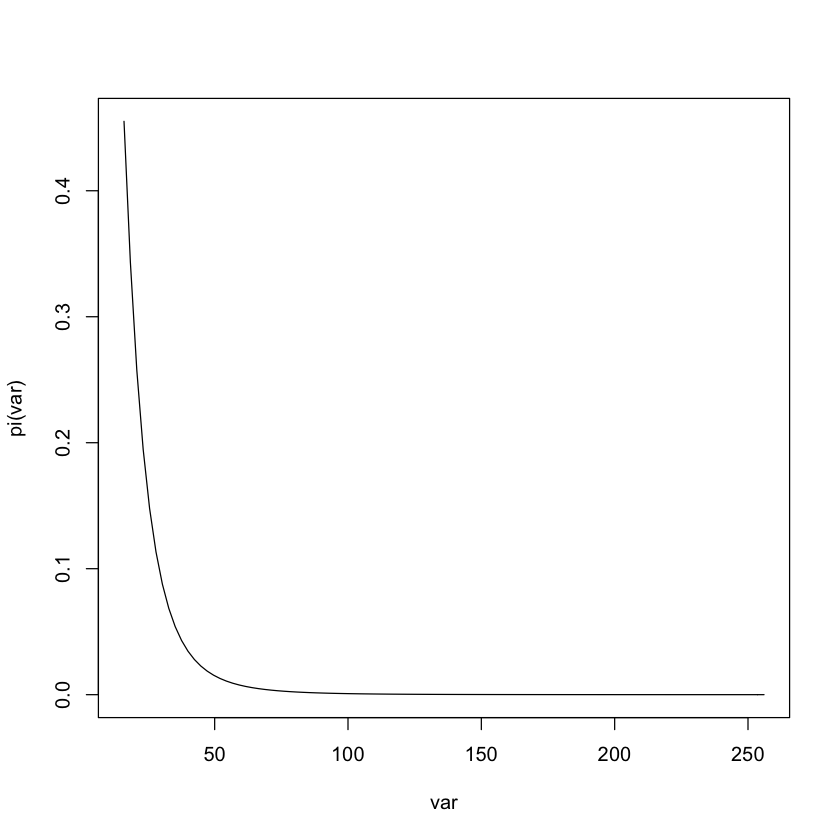

In [221]:
pi = function(var) pchisq(var0 / var * z_alpha, n - 1)
curve(pi, from=16, to=256, xname='var')
pi(36)

## Ejercicio 4

Se supone que 1 de cada 10 fumadores prefiere la marca A. Después de una campaña publicitaria en cierta región de ventas, se entrevistó a 200 fumadores para determinar la efectividad de la campaña. El resultado de esta encuesta mostró que 26 personas preferían la marca A.

### Pregunta A

¿Indican estos datos, a nivel aproximado 0.05, un aumento en la preferencia por la marca A?

$H_0 : p = p_0$ vs $H_1 : p > p_0$

$\bar{X} = \tfrac{26}{200} = 0.13$

$p_0 = \tfrac{1}{10} = 0.1$

$s_0 = \sqrt{p_0(1 - p_0)}$

$\alpha = 0.05$

$T = \sqrt{n} \frac{\bar{X} - p_0}{s_0}$

Región de rechazo: $T \geq z_{\alpha}$

In [222]:
n = 200
Xbar = 0.13
p0 = 0.1
s0 = sqrt(p0 * (1 - p0))
alpha = 0.05
T = sqrt(n) * (Xbar - p0) / s0
z_alpha = qnorm(alpha, 0, 1, lower.tail=FALSE)
T >= z_alpha

[1] FALSE

No se rechaza la $H_0$ y por lo tanto no se puede concluir en base a la muestra tomada si aumentó la preferencia por la marca A.

### Pregunta B

Calcular el p-valor aproximado.

In [223]:
pnorm(T, 0, 1, lower.tail=FALSE)

[1] 0.0786496

### Pregunta C

¿Cuál es la probabilidad aproximada de decidir que la campaña publicitaria no fue efectiva, cuando en realidad la proporción de preferencia por la marca A después de la campaña es 0.15?

$\sigma = \sqrt{p(1 - p)}$

$
\begin{align*}
\pi(p) = P_{p_0 = p}(T \in R)
&= P(T \geq z_\alpha) \\
&= 1 - P(T \leq z_\alpha) \\
&= 1 - P(\sqrt{n} \frac{\bar{X} - p_0}{s_0} \leq z_\alpha) \\
&= 1 - P(\sqrt{n} \frac{\bar{X} - p + p - p_0}{s_0} \frac{\sigma}{\sigma} \leq z_\alpha) \\
&= 1 - P(\sqrt{n} \frac{\bar{X} - p + p - p_0}{\sigma} \frac{\sigma}{s_0} \leq z_\alpha) \\
&= 1 - P \Big( \sqrt{n} \big( \frac{\bar{X} - p}{\sigma} + \frac{p - p_0}{\sigma} \big) \frac{\sigma}{s_0} \leq z_\alpha \Big) \\
&= 1 - P \Big( \sqrt{n} \big( \frac{\bar{X} - p}{\sigma} + \frac{p - p_0}{\sigma} \big) \leq z_\alpha \frac{s_0}{\sigma} \Big) \\
&= 1 - P \Big( \sqrt{n} \frac{\bar{X} - p}{\sigma} \leq z_\alpha \frac{s_0}{\sigma} - \sqrt{n} \frac{p - p_0}{\sigma} \Big) \\
&= 1 - P \Big( Z \leq z_\alpha \frac{s_0}{\sigma} - \sqrt{n} \frac{p - p_0}{\sigma} \Big) \\
&= 1 - \Phi \Big( z_\alpha \frac{s_0}{\sigma} - \sqrt{n} \frac{p - p_0}{\sigma} \Big)
\end{align*}
$

$p \in H_1 \implies \pi(p) = 1 - \beta(p) \iff \beta(p) = 1 - \pi(p) \iff \beta(p) = \Phi \Big( z_\alpha \frac{s_0}{\sigma} - \sqrt{n} \frac{p - p_0}{\sigma} \Big)$

In [224]:
p = 0.15
sd = sqrt(p * (1 - p))
pnorm(z_alpha * (s0 / sd) - sqrt(n) * (p - p0) / sd)

[1] 0.274806

### Pregunta D

Implementar la función potencia y graficarla. ¿Qué características tiene esta función? Interpretar.

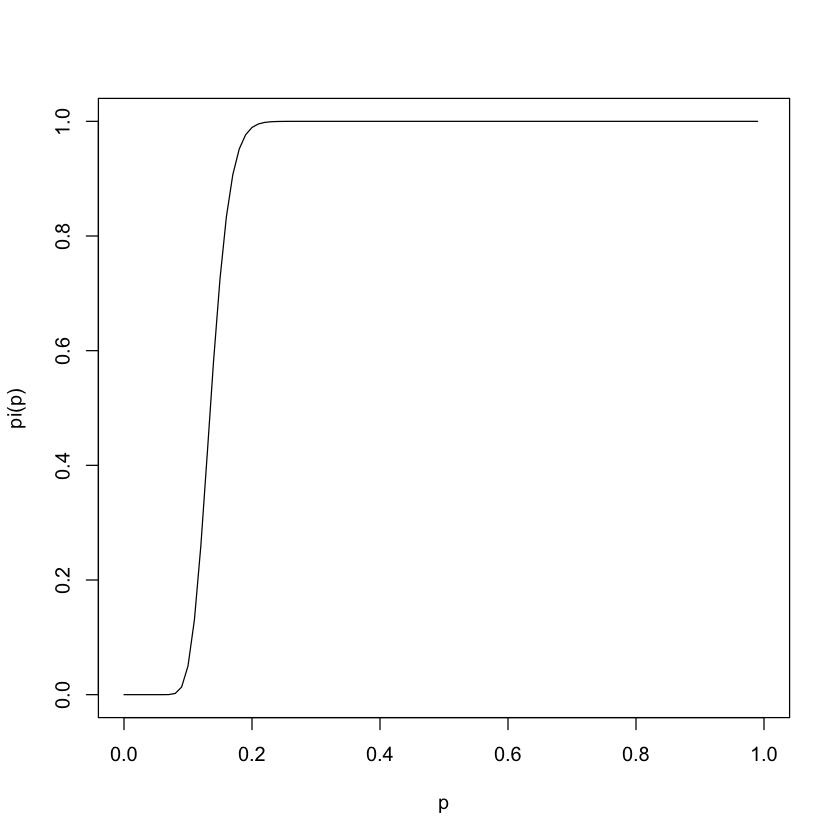

In [225]:
pi = function (p) {
    sd = sqrt(p * (1 - p))
    return(1 - pnorm(z_alpha * (s0 / sd) - sqrt(n) * (p - p0) / sd))
}
curve(pi, from=0, to=1, xname='p')

A medida que aumenta el verdadero valor de $p$, aumenta la probabilidad de rechazar la $H_0$ que planteaba $p = p_0 = 0.1$

### Pregunta E

¿Qué tamaño de muestra debería tomarse para que la probabilidad de c) fuese a lo sumo 0.05?

$
\begin{align*}
&\Phi \Big( z_\alpha \frac{s_0}{\sigma} - \sqrt{n} \frac{p - p_0}{\sigma} \Big) \leq 0.05 \\
&\iff z_\alpha \frac{s_0}{\sigma} - \sqrt{n} \frac{p - p_0}{\sigma} \leq \Phi^{-1}(0.05) \\
&\iff z_\alpha \frac{s_0}{\sigma} - \Phi^{-1}(0.05) \leq \sqrt{n} \frac{p - p_0}{\sigma} \\
&\iff z_\alpha \frac{s_0}{p - p_0} - \Phi^{-1}(0.05) \frac{\sigma}{p - p_0} \leq \sqrt{n} \\
&\iff \Big( z_\alpha \frac{s_0}{p - p_0} - \Phi^{-1}(0.05) \frac{\sigma}{p - p_0} \Big)^2 \leq n
\end{align*}
$

In [226]:
p = 0.15
sd = sqrt(p * (1 - p))
ceiling((z_alpha * s0 / (p - p0) - qnorm(0.05) * sd / (p - p0))^2)

[1] 468

### Pregunta F

Decidir si las siguientes afirmaciones son V o F. Justificar.

#### Item i

Si la verdadera proporción de fumadores que prefieren la marca A es mayor que 0.15, la probabilidad de que este test rechace $H_0$ es mayor que 0.725.

**Verdadero**

In [227]:
pi(0.15) >= 0.725

[1] TRUE

#### Item ii

Cuánto más pequeña es la verdadera proporción de fumadores que prefieren la marca A más improbable es que el test rechace $H_0$.

**Verdadero**

#### Item iii

$\pi(0.1) = 0.05$

**Verdadero**

In [228]:
pi(0.1)

[1] 0.05

#### Item iv

La probabilidad de error de tipo II es una función creciente de $p$, donde $p$ es la verdadera proporción de fumadores que prefieren la marca A.

**Falso**

## Ejercicio 5

Se supone que el tiempo de duración de cierto tipo de lamparitas tiene distribución exponencial. Una fábrica garantiza que el tiempo medio de vida de las lamparitas que produce es mayor que 50 días, y la empresa vendedora quiere asegurarse que la producción satisface las especificaciones antes de sacarla a la venta. Para ello toma al azar una muestra de 40 lamparitas y observa el tiempo de duración de las mismas, obteniendo un promedio de 53 días.

### Pregunta A

Proponer un test de nivel exacto con hipótesis nula simple para este problema de manera tal que la probabilidad de que la empresa decida no vender si no se satisfacen los requerimientos sea del 0.95.

$n = 40$

### Pregunta B

¿Qué decisión se toma en base a los tiempos observados?

### Pregunta C

Repetir a) usando un nivel aproximado.

### Pregunta D

Calcular la función de potencia aproximada para el test del ítem anterior. ¿Este test conserva el nivel aproximado 5% si ampliamos la hipótesis nula, reemplazándola por una hipótesis compuesta?

### Pregunta E

Utilizando el test aproximado, ¿qué probabilidad tiene la empresa de no sacar la producción a la venta, si el promedio de vida verdadero es 52 días?

### Pregunta F

¿Cuál debería ser el tamaño de la muestra para que la probabilidad de d) fuese 0.1?

## Ejercicio 6

Se desea determinar si un dado de seis caras está cargado o no. Para ello se arroja el dado 1000 veces obteniéndose los resultados contenidos en el archivo dado.txt, que se encuentra en la página web de la materia.

Estamos interesados en testear las hipótesis $H_0$ : El dado es equilibrado vs. $H_1$ : El dado está cargado. Para ello consideramos distintos tests:

In [229]:
dado = scan('./datasets/p9/dado.txt')
n = length(dado)

Todas las preguntas tienen la misma estructura de tests:

$H_0 : p = p_0$ vs $H_1 : p \neq p_0$

$p_0 = 0.5$

$s_0 = \sqrt{p_0(1 - p_0)}$

$p$ = proporción de la v.a. de cada pregunta en cuestión

$\alpha = 0.05$

$T = \sqrt{n} \frac{p - p_0}{s_0}$

Región de rechazo: $|T| \geq z_{\alpha/2}$

In [230]:
alpha = 0.05

calcularT = function(p, p0) sqrt(n) * (p - p0) / sqrt(p0 * (1 - p0))

rechazar = function(p, p0) {
    T = calcularT(p, p0)
    z_alpha2 = qnorm(alpha / 2, 0, 1, lower.tail=FALSE)
    return(abs(T) >= z_alpha2)
}

pValor = function(p, p0) {
    T = calcularT(p, p0)
    return(2 * pnorm(abs(T), 0, 1, lower.tail=FALSE))
}

### Pregunta A

Sea $X$ = cantidad de veces que el resultado del dado es par. Plantear las hipótesis y determinar la región de rechazo para un test de nivel aproximado $\alpha = 0.05$ basado en $X$. Para el conjunto de datos obtenido, ¿cuál es el p-valor aproximado?, ¿cuál es la decisión?

In [231]:
p0 = 0.5
p = sum(dado %% 2 == 0) / n
rechazar(p, p0)
pValor(p, p0)

[1] FALSE

[1] 0.3427817

### Pregunta B

Sea $Y$ = cantidad de veces que el resultado del dado es menor o igual que 3. Plantear claramente las hipótesis y determinar la región de rechazo para un test de nivel aproximado $\alpha = 0.05$ basado en $Y$. Para el conjunto de datos obtenido, ¿cuál es el p-valor aproximado?, ¿cuál es la decisión?.

In [232]:
p0 = 0.5
p = sum(dado <= 3) / n
rechazar(p, p0)
pValor(p, p0)

[1] FALSE

[1] 0.7043364

### Pregunta C

Sea $W$ = cantidad de veces que el resultado del dado es exactamente 3. Plantear claramente las hipótesis y determinar la región de rechazo para un test de nivel aproximado $\alpha = 0.05$ basado en $W$. Para el conjunto de datos obtenido, ¿cuál es el p-valor aproximado?, ¿cuál es la decisión?.

In [233]:
p0 = 1 / 6
p = sum(dado == 3) / n
rechazar(p, p0)
pValor(p, p0)

[1] FALSE

[1] 0.8209882

### Pregunta D

Sea $U$ = cantidad de veces que el resultado del dado es exactamente 2. Plantear claramente las hipótesis y determinar la región de rechazo para un test de nivel aproximado $\alpha = 0.05$ basado en $U$. Para el conjunto de datos obtenido, ¿cuál es el p-valor aproximado?, ¿cuál es la decisión?.

In [234]:
p0 = 1 / 6
p = sum(dado == 2) / n
rechazar(p, p0)
pValor(p, p0)

[1] TRUE

[1] 3.450634e-14

### Pregunta E

En base a los resultados obtenidos. ¿Qué decisión tomaría? ¿Está cargado el dado?

Podemos concluir que el dado está cargado.

Por el test D, se observa directamente que el 2 está cargado. Pero el 1 y 3 no están cargados por el test B.

Por el test A, como no pudimos rechazar $H_0$ pero ya sabemos que el 2 está cargado, entonces el 4 o el 6 podrían estar cargados o ninguno está cargado (y en cierto sentido están "descargados").

Como la media es 3.683, y el 2 está cargado, esto nos dice que hay algún número > 3 que está cargado y está "balanceando" la media hacia el centro (o sea, la media real que es 3).

También podemos mirar el histograma y ahí se observa que el 5 está cargado de forma similar al 2.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   3.683   5.000   6.000 

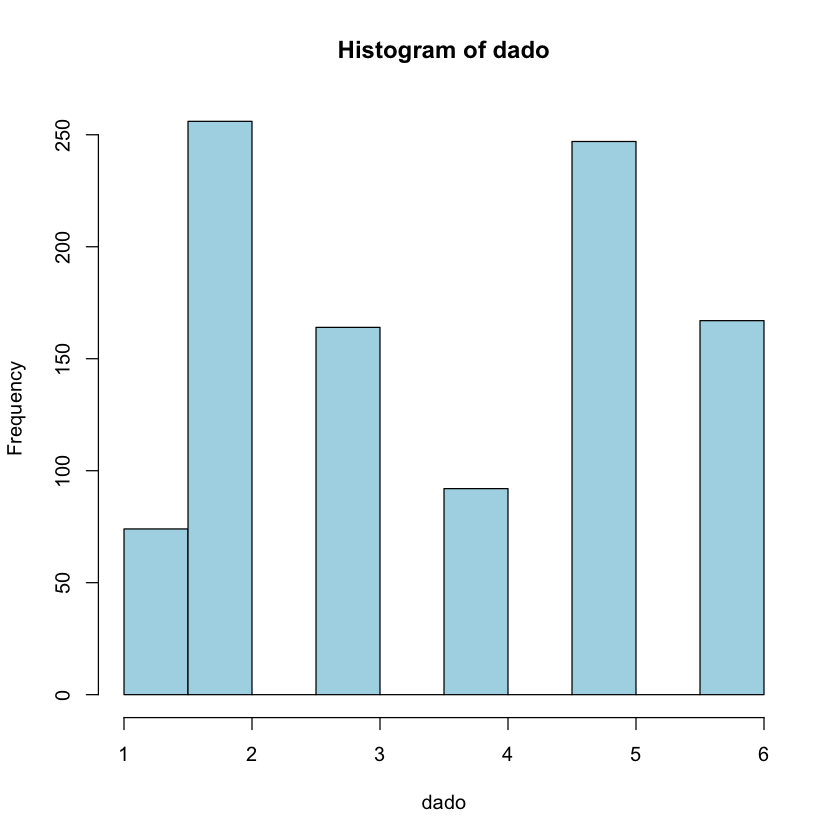

In [235]:
summary(dado)
hist(dado, col='lightblue')

## Ejercicio 7

En cada caso indique si la afirmación es verdadera o falsa y justifique:

### Pregunta A

El nivel de significación de un test es igual a la probabilidad de que la hipótesis nula sea cierta.

**Falso**

Solo podemos rechazar la $H_0$ pero no podemos afirmar si es verdadera o no.

### Pregunta B

Un error de tipo II es más grave que un error de tipo I.

**Falso**

Esto es más por convención que por algún argumento lógico, por lo general se acepta que es peor difamar que no decir nada, pero depende de cada caso particular.

### Pregunta C

Si el p-valor es 0.3, el test correspondiente rechazará al nivel 0.01.

**Falso**

La regla es al revés: p-valor $ \leq \alpha \iff $ rechazamos $H_0$

### Pregunta D

Si un test rechaza al nivel de significación 0.06, entonces el p-valor es menor o igual a 0.06.

**Verdadero**

### Pregunta E

Si un intervalo de confianza de nivel 0.99 para la media $\mu$ de una distribución normal calculado a partir de una muestra da como resultado $(2.1, 3.3)$, entonces el test para las hipótesis $H_0 : \mu = 3$ vs. $H_1 : \mu \neq 3$ basado en los mismos datos rechazará la hipótesis nula al nivel 0.01.

**Falso**

La propiedad es al revés. Si el $\mu_0$ utilizado en el test de hipótesis **no** pertenece al intervalo de confianza, entonces podemos afirmar que esa probabilidad es de 0.01, y por lo tanto, podemos afirmar que vamos a rechazar la $H_0$ con esa misma probabilidad.